In [1]:
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
import time
import pandas as pd
import os
import glob
import re

import seaborn as sns

%matplotlib inline

sns.set_context("paper")
# sns.set_style("darkgrid", {"axes.facecolor": ".95"})
# sns.set_style("whitegrid")

In [2]:
# name = "spiral"
name = "circle"
file_name = 'results/' + name
with open(file_name, 'rb') as f:
    load_result = pickle.load(f)
    
raw_pd = pd.DataFrame(np.stack(load_result, axis = 0))
stat_pd = pd.DataFrame()
stat_pd['mean'] = raw_pd.mean()
stat_pd['std-error'] = raw_pd.sem()

In [3]:
exp_df = raw_pd

mode = 0

rename_dict = {0: '$H_0$ G',
               1: '$H_1$ G',
               2: '$H_0$ P',
               3: '$H_1$ P',
               4: '$H_0$ O',
               5: '$H_1$ O'}
if mode == 0:
    exp_df = exp_df[[0,2,4]]
else:
    exp_df = exp_df[[1,3,5]]
    
exp_df = exp_df.rename(columns = rename_dict)


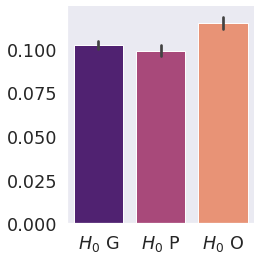

In [4]:
sns.set(font_scale=1.6)
sns.set_style("dark")
height = 4
width = 4
g = sns.catplot(data=exp_df, 
                kind="bar",   
                palette="magma",
                alpha=.99,
                height=height,
                aspect=width/height)
filesave = 'viz/viz_' + name + str(mode) + ".png"

# plt.savefig(filesave, transparent=True)